In [1]:
using Revise
using CMBLensing
using Plots

┌ Info: Precompiling CMBLensing [b60c06c0-7e54-11e8-3788-4bd722d65317]
└ @ Base loading.jl:1317


In [2]:
@unpack f, f̃, ϕ, ds = @time load_sim_dataset(
    Nside             = 128,
    T                 = Float32,
    θpix              = 16, 
    pol               = :P,
    L                 = LenseFlow{RK4Solver{10}},
    seed              = 1,
    fiducial_θ        = (; r=0.05),
    beamFWHM          = 3,
    μKarcminT         = 1,
);

 26.619003 seconds (49.76 M allocations: 3.033 GiB, 3.83% gc time, 5.44% compilation time)


In [61]:
# Set backend

pyplot() # best for most cases

#plotly() # tricky to get working robustly with jupyter notebooks
#gr() # good for fast plots, but ugly
#pgfplots() # redundant because it doesn't support :heatmap series
#pgfplotsx() # wanted to get this working, but it just isn't fast enough at plotting heatmaps to be useful

Plots.PyPlotBackend()

# Maps

Plotting maps. 

## Flat S0 Maps

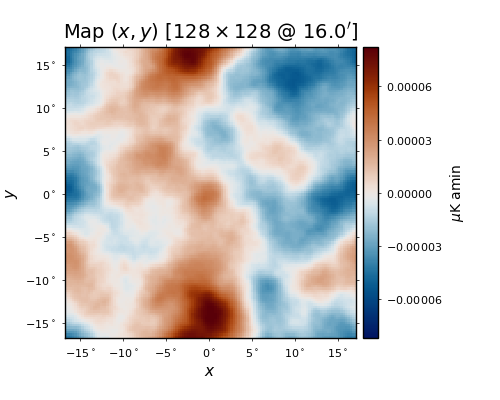

In [62]:
plot(ϕ)

## Flat S2 Maps

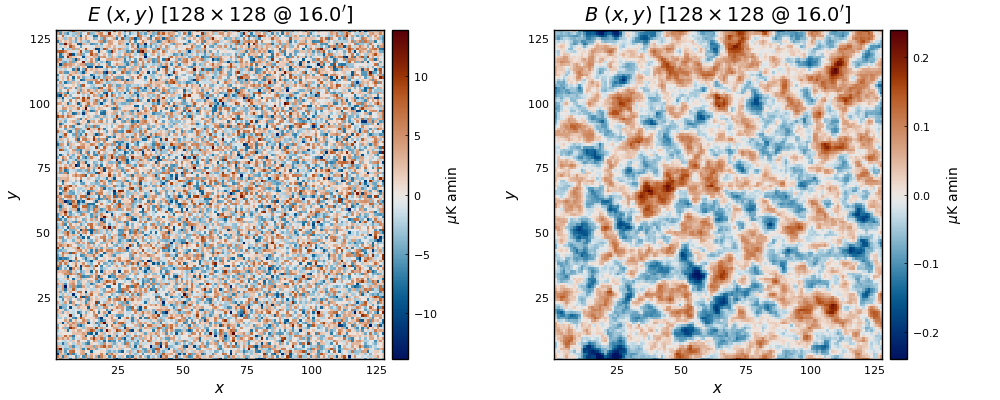

In [64]:
plot(f)

## Tuples of maps 

# Power spectra

Plotting power spectra

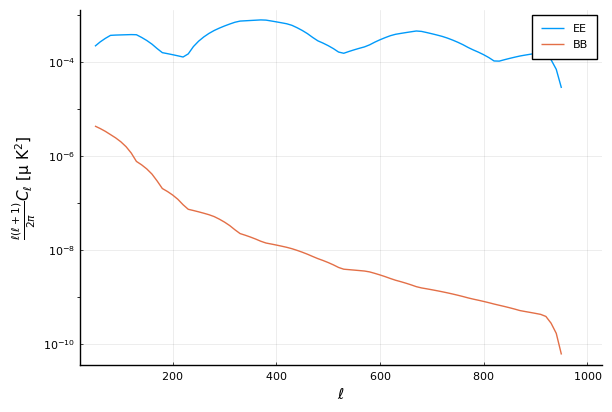

In [52]:
plot(get_Cℓ(f, which=:EE), 50:10:1000, label="EE")
plot!(get_Cℓ(f, which=:BB), 50:10:1000, label="BB")
savefig("plot.pdf")

# Histograms

Plotting histograms

# Chains

Plotting chains